In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# -------------------------------------
# 1. LOAD DATA
# -------------------------------------
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

In [10]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
day.shape

(731, 16)

In [19]:
hour.shape

(17379, 17)

In [20]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
day.duplicated().sum()

0

In [23]:
hour.duplicated().sum()

0

In [24]:
plt.style.use("seaborn-v0_8")

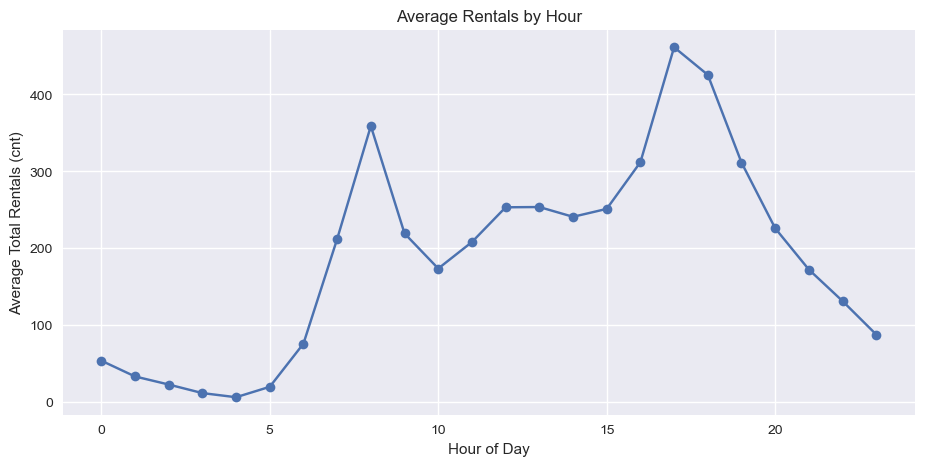

In [25]:
# AVERAGE RENTALS BY HOUR
# -------------------------
avg_by_hour = hour.groupby("hr")["cnt"].mean()

plt.figure(figsize=(11,5))
plt.plot(avg_by_hour.index, avg_by_hour.values, marker="o")
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Rentals (cnt)")
plt.grid(True)
plt.show()

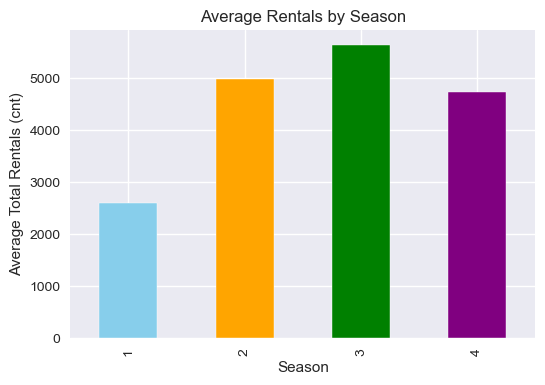

In [26]:
# AVERAGE RENTALS BY SEASON
# -------------------------
avg_by_season = day.groupby("season")["cnt"].mean()

plt.figure(figsize=(6,4))
avg_by_season.plot(kind="bar", color=["skyblue","orange","green","purple"])
plt.title("Average Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Rentals (cnt)")
plt.show()

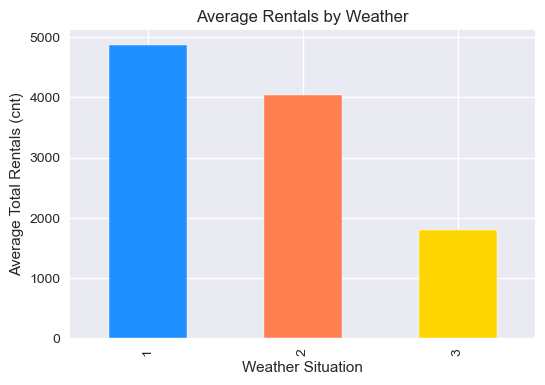

In [27]:
# AVERAGE RENTALS BY WEATHER SITUATION
# -------------------------
avg_by_weather = day.groupby("weathersit")["cnt"].mean()

plt.figure(figsize=(6,4))
avg_by_weather.plot(kind="bar", color=["dodgerblue","coral","gold","gray"])
plt.title("Average Rentals by Weather")
plt.xlabel("Weather Situation")
plt.ylabel("Average Total Rentals (cnt)")
plt.show()

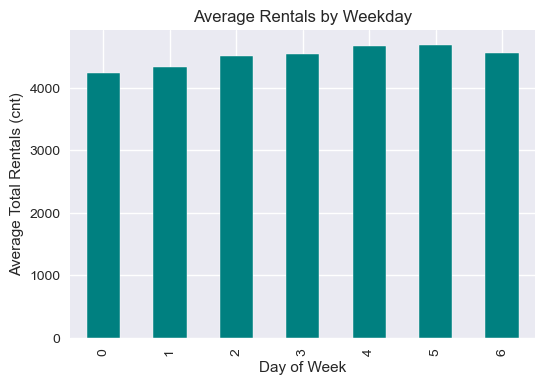

In [28]:
# AVERAGE RENTALS BY WEEKDAY
# -------------------------
avg_by_weekday = day.groupby("weekday")["cnt"].mean()

plt.figure(figsize=(6,4))
avg_by_weekday.plot(kind="bar", color="teal")
plt.title("Average Rentals by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Total Rentals (cnt)")
plt.show()

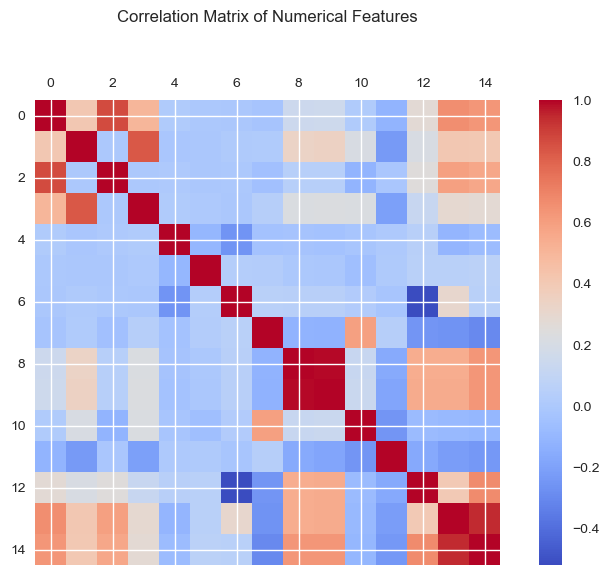

In [29]:
# CORRELATION MATRIX
# -------------------------
plt.figure(figsize=(10,6))
corr = day.corr(numeric_only=True)
plt.matshow(corr, fignum=1, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Matrix of Numerical Features", y=1.15)
plt.show()

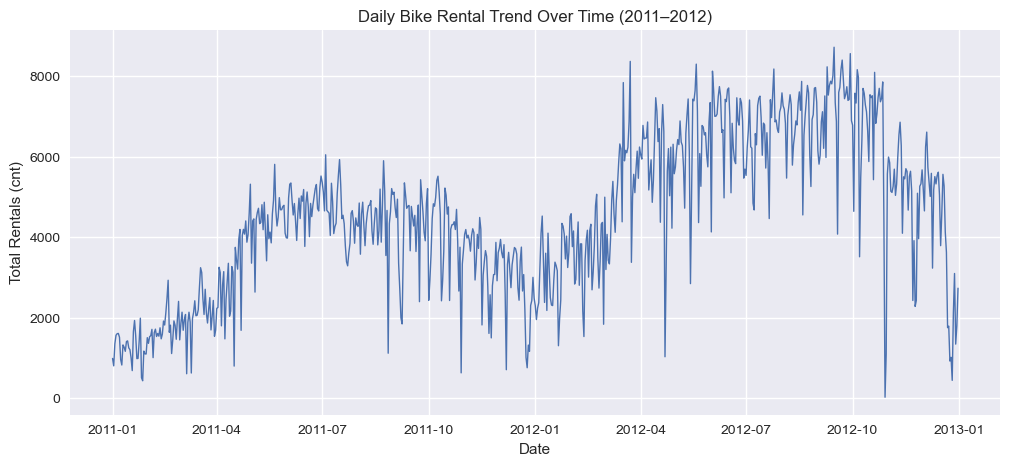

In [30]:
# DAILY BIKE RENTAL TREND
# -------------------------
day["dteday"] = pd.to_datetime(day["dteday"])

plt.figure(figsize=(12,5))
plt.plot(day["dteday"], day["cnt"], linewidth=1)
plt.title("Daily Bike Rental Trend Over Time (2011–2012)")
plt.xlabel("Date")
plt.ylabel("Total Rentals (cnt)")
plt.grid(True)
plt.show()